# TP2: Algorithmes géométriques

### Import des modules de base

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1

Dans cet exercice on se propose de comparer l'algorithme naîf de calcul de point le plus proche avec l'approche par kd-tree.

1.Générer $m$ points sources et $n$ points cibles aléatoires dont les coordonnées en $x$ et en $y$ sont dans $[0,1]$.

2.Ecrire un algorithme naïf qui pour chacun des $m$ points renvoie l'indice du point cible le plus proche. Vous éviterez les boucles en python et chercherez plutôt des fonctions numpy en regardant ce lien:
https://docs.scipy.org/doc/numpy/reference/routines.sort.html

3.Visualiser la correspondance entre points sources et points cibles en affichant pour chaque point source le segment qui le lie à son point cible le plus proche. Vous afficherez les points sources et cibles de deux manières différentes.

4.Lancer la commande suivante qui importe le sous-module kdtree

In [2]:
from scipy.spatial import kdtree

m=10
n=5

sources = np.random.rand(m,2)
cibles = np.random.rand(n,2)

indices = np.zeros((m))

for i in range(m):
    distance = np.sum((cibles - sources[i,:])**2,axis=1)
    indices[i] = distance.argmin()
    
print(indices)
print(sources)
print(cibles)


[4. 0. 0. 3. 2. 0. 1. 2. 0. 0.]
[[0.47928174 0.35713137]
 [0.39568751 0.69568604]
 [0.71388408 0.93157477]
 [0.35718882 0.46970659]
 [0.86133118 0.60964364]
 [0.26823473 0.88955166]
 [0.04160426 0.10039488]
 [0.91897314 0.25115792]
 [0.55311238 0.81059014]
 [0.76109421 0.89913447]]
[[0.46450706 0.63806073]
 [0.32747669 0.1487439 ]
 [0.77519557 0.3004016 ]
 [0.29591133 0.48157831]
 [0.54069553 0.24290448]]


Le calcul du kdtree associé à des coordonnées de points (stockés dans un numpy array X) se fait à l'aide d'une instruction de la forme:

In [3]:
X = np.vstack((sources,cibles))

Tree=kdtree.KDTree(X)

nearest_dist, nearest_ind = Tree.query(X, k=2)  # k=2 nearest neighbors where k1 = identity
print(X)
print(nearest_dist[:, 1])    # drop id; assumes sorted -> see args!
print(nearest_ind[:, 1])     # drop id 



[[0.47928174 0.35713137]
 [0.39568751 0.69568604]
 [0.71388408 0.93157477]
 [0.35718882 0.46970659]
 [0.86133118 0.60964364]
 [0.26823473 0.88955166]
 [0.04160426 0.10039488]
 [0.91897314 0.25115792]
 [0.55311238 0.81059014]
 [0.76109421 0.89913447]
 [0.46450706 0.63806073]
 [0.32747669 0.1487439 ]
 [0.77519557 0.3004016 ]
 [0.29591133 0.48157831]
 [0.54069553 0.24290448]]
[0.12968977 0.08975972 0.0572815  0.06241689 0.30635338 0.23200882
 0.2899322  0.15197674 0.1939518  0.0572815  0.08975972 0.23308472
 0.15197674 0.06241689 0.12968977]
[14 10  9 13  9  1 11 12 10  2  1 14  7  3  0]


Regarder les méthodes de l'objet Tree et trouver la façon d'obtenir le point le plus proche.

5.En gardant fixes $m$ points aléatoires, faites maintenant varier $n$ de $10$ à $200$ par exemple, par pas de $10$. Générer $n$ points cibles aléatoires et comparer le calcul naïf des plus proches points avec le calcul par kd-tree. Vous pourrez mesurer le temps de calcul en utilisant la méthode time du module time. Affichez les temps de calcul en fonction de $n$. Que remarque-t-on ?

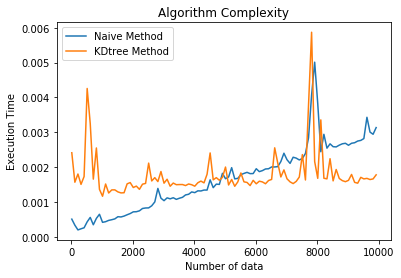

In [5]:
import time

n_array = np.arange(10,10000,100)
naive_times = []
kdtree_times = []

for n in n_array:
    
    cibles = np.random.rand(n,2)
    
    start_time = time.time()
    
    for i in range(m):
        distance = np.sum((cibles - sources[i,:])**2,axis=1)
        indices[i] = distance.argmin()
    
    elapsed_time = time.time() - start_time
    
    naive_times.append(elapsed_time)
    
    X = np.vstack((sources,cibles))
    
    Tree=kdtree.KDTree(X)
    
    start_time2 = time.time()
    nearest_dist, nearest_ind = Tree.query(X[:m], k=2)  
    elapsed_time2 = time.time() - start_time2

    kdtree_times.append(elapsed_time2)
    X = []
    

plt.plot(n_array,naive_times,label="Naive Method")
plt.plot(n_array,kdtree_times,label="KDtree Method")
plt.title("Algorithm Complexity")
plt.ylabel("Execution Time")
plt.xlabel("Number of data")

plt.legend()
plt.show()

## Exercice 2

Dans cet exercice on va chercher à déterminer si un point est intérieur au cercle circonscrit à un triangle ABC.

1.Définir une matrice $A$ de taille $2\times 2$ aléatoire et un vecteur $y$ de taille $2\times 1$ aléatoire. Vous utiliserez une méthode de numpy.random.

2.Résoudre le système linéaire $Ax=y$. 

3.Vérifier que le résultat est correct en multipliant $A$ par $x$.

4.Ecrire une fonction qui calcule le centre du cercle circonscrit à un triangle. Vous reprendrez les formules du cours qui donnent la matrice à inverser et le vecteur. On propose l'en-tête suivant où coords est un numpy array de taille $3\times 2$ qui donne les coordonnées des $3$ points du triangle.

(2, 2) (2,)
[False False]
[0.79664544 0.81279207] 0.1698680731850913
[[0.96579146 0.82843766]
 [0.70765888 0.66809738]
 [0.82374272 0.98048495]]


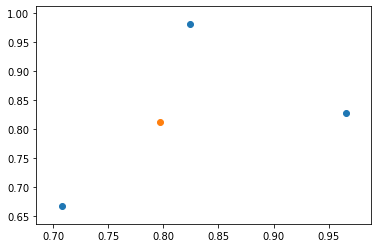

In [17]:
A = np.random.rand(2,2)
y = np.random.rand(2,1)

x = np.linalg.solve(A, y)

#print(np.dot(A,x) == y)

tri = np.random.rand(3,2)

def centreCercleCirconscrit(coords):
    A = coords[0]
    B = coords[1]
    C = coords[2]
    
    T = np.array([[B[0] -A[0],B[1]-A[1]],[C[0]-A[0],C[1]-A[1]]])
    K = np.array([B[0]**2+B[1]**2-A[0]**2 -A[1]**2,C[0]**2+C[1]**2-A[0]**2 -A[1]**2])
    print(T.shape ,K.shape)
    x = np.linalg.solve(T, K/2)
    r = np.linalg.norm(x-B)

    return x,r

center , radix = centreCercleCirconscrit(tri)

print(center,radix)
print(tri)
plt.scatter(tri[:,0],tri[:,1])
plt.scatter(center[0],center[1])
plt.show()

5.Ecrire finalement une fonction qui teste si un point en entrée est dans le cercle circonscrit à un triangle. Vous appelerez notamment la fonction précédente et calculerez le rayon du cercle. L'en tête sera:

(2, 2) (2,)
[False False]
False


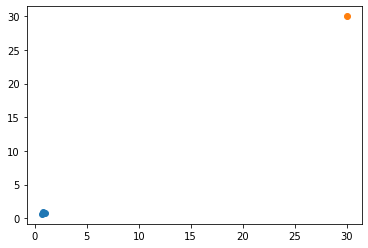

In [22]:
def estDansCirconscrit(point,coords):
    
    center , radix = centreCercleCirconscrit(coords)
    return(np.linalg.norm(point-center)<radix)

print(estDansCirconscrit([30,30],tri))
plt.scatter(tri[:,0],tri[:,1])
plt.scatter(30,30)
plt.show()

## Exercice 3

Dans cet exercice on va chercher à déterminer si un point est intérieur à un polygone.

1.Ecrire une fonction qui prend en entrées un tableau de coordonnées 2D de n points $P_1$,...,$P_n$, un point $C$ et renvoie les indices des points triés par ordre croissant de l'angle polaire $CP_i$. Vous utiliserez la fonction angle de numpy. Vous consulterez aussi la documentation de numpy pour ce qui concerne le tri de valeurs: https://docs.scipy.org/doc/numpy/reference/routines.sort.html

L'en tête de la fonction sera de la forme:


In [26]:
from numpy.linalg import norm
polygon = np.array([[1, 1], [-1,-1],[1,-1],[-1,1]])

c_point = np.array([0,0])
                   
def triAnglePolaire(coords,point):
    """
    res = np.zeros(len(coords))
    for i in range(len(coords)):
        if norm(point) >0:
            res[i] =np.arccos((coords[i] @ point) / (norm(coords[i]) * norm(point)))
        else:
            res[i] =np.arccos((coords[i] @ point) / (norm(coords[i])))
    """
    res = np.zeros(len(coords))
    for i in range(len(coords)):
        vector = np.array([coords[i,0]-point[0],coords[i,1]-point[1]])
        z = complex(vector[0],vector[1])
        print(z)
        res[i] = np.angle(z,deg=True)
        
    return res
                   
polar_angs = triAnglePolaire(polygon,c_point)

ind = np.argsort(polar_angs)
print(ind)
print(polygon)
print(polar_angs)

polygon = polygon[ind]
polar_angs = polar_angs[ind]

print(polygon)
print(polar_angs)

(1+1j)
(-1-1j)
(1-1j)
(-1+1j)
[1 2 0 3]
[[ 1  1]
 [-1 -1]
 [ 1 -1]
 [-1  1]]
[  45. -135.  -45.  135.]
[[-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1  1]]
[-135.  -45.   45.  135.]


2.Ecrire une fonction qui 

- prend en entrée un point $Q$, un point $C$, des points $P_1,...,P_n$ triés par angle polaire de $CP_i$ croissant.
- trouve $i$ tel que $angle(P_i) \leq angle(Q) \leq P_{i+1}$
- détermine si $Q$ est du même côté de la droite $(P_i,P_{i+1})$ que C ou non.

3.Faites des tests sur quelques polygones choisis par vous. Vous vous intéresserez à des polygones convexes ou étoilés simples.

False


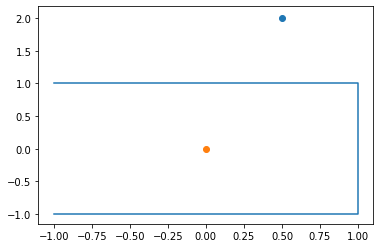

In [27]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return False
    return True

def is_inside(Q,C,points,angs):
    
    vector = np.array([Q[0]-C[0],Q[1]-C[1]])
    z = complex(vector[0],vector[1])
    q_ang = np.angle(z)
    for i in range(len(points)):
        if  angs[i-1]< q_ang and angs[i]>q_ang:
            #d1 = norm(np.cross(points[i]-points[i-1], points[i-1]-C))/norm(points[i]-points[i-1])
            linePP = [points[i],points[i-1]]
            lineQC = [Q,C]
            if line_intersection(linePP,lineQC):
                return False
    return True



Q = np.array([0.5,2])
print(is_inside(Q,c_point,polygon,polar_angs))

plt.plot(polygon[:,0],polygon[:,1])
plt.scatter(Q[0],Q[1])
plt.scatter(c_point[0],c_point[1])
plt.show()